***Importing the necessary libraries***

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, r2_score
import joblib


***Loading the Dataset***

In [42]:
# 📥 Load Dataset
df = pd.read_excel("/kaggle/input/stirlingmaintenance/stirling_engine_maintenance_dataset.xlsx", sheet_name="Sheet1")
#getting some info
print(df.head())
print(df.info())


   flow_rate_L_per_min  temp_hot_C  temp_cold_C    pH  efficiency_%  \
0                10.99       79.38        28.72  6.49         71.90   
1                 9.72       77.12        20.29  6.62         72.08   
2                11.30       70.68        28.26  7.00         66.11   
3                13.05       89.60        21.29  6.79         83.85   
4                 9.53       78.17        23.35  7.80         75.12   

   maintenance_needed  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flow_rate_L_per_min  500 non-null    float64
 1   temp_hot_C           500 non-null    float64
 2   temp_cold_C          500 non-null    float64
 3   pH                   500 non-null    float64
 4   efficiency_%        

***Data preprocessing***

In [43]:
#Checking for some NAN  or inconsistent data values in case of malfuncitons in the captors
#Defining a function that removes outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


df.dropna()
for col in ['flow_rate_L_per_min', 'temp_hot_C', 'pH', 'temp_cold_C']:
    df = remove_outliers_iqr(df, col)

#Filter invalid temp readings
df = df[df['temp_hot_C'] > df['temp_cold_C']]


***Splitting the data and defining the target variables***

In [44]:
features = ['flow_rate_L_per_min', 'temp_hot_C', 'temp_cold_C', 'pH']

X = df[features]
y_class = df['maintenance_needed']     # 0 or 1
y_reg = df['efficiency_%']          # e.g. 0 to 100

# Split for both tasks
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)


***Training the classification model to check for maintenance needs***

In [45]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_class, y_train_class)


RandomForestClassifier(random_state=42)

***Making Predictions and evaluations***

In [46]:
# 📊 Predict & Evaluate
y_pred = rf.predict(X_test_class)

print("\n✅ Classification Report:")
print(classification_report(y_test_class, y_pred))

print("✅ Accuracy:", accuracy_score(y_test_class, y_pred))


✅ Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        83
           1       0.50      0.53      0.51        17

    accuracy                           0.83       100
   macro avg       0.70      0.71      0.71       100
weighted avg       0.83      0.83      0.83       100

✅ Accuracy: 0.83


***Confusion matrix***

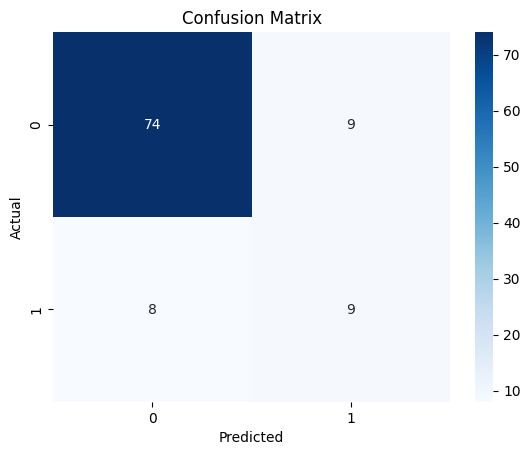

In [47]:
# 📉 Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

***Training the regressor model for predicting the efficiency***

In [48]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

print("\n📈 Regression Results:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))



📈 Regression Results:
MAE: 4.468081000000002
R² Score: 0.3939057665094513


***Saving the Models***

In [49]:
joblib.dump(rf, "stirling_maintenance_classifier.pkl")
joblib.dump(reg, "stirling_performance_regressor.pkl")
print("✅ Models saved!")


✅ Models saved!
